Laboratory work #2  
Nikita Naumov 19AMI-1

System information:  
- CPU: Intel core i5-12400f  
- GPU: NVIDIA RTX 3060 12GB  
- RAM: 32GB ddr4 3200 GHz  

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

import pandas as pd
import numpy as np
import celluloid as cld

In [2]:
sequential_data = pd.read_csv('cuda_singlethread.csv', sep=',')
sequential_data

,step,x1,x2,y,phi1,phi2,Ax,Bx,Ay,By,C,calc_time,anim_time
0,0,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.353,0.299689,0.299689,1.178097,1.253647,0.00
1,1,-0.167747,0.167747,0.207102,2.034275,2.034275,-0.353,0.353,0.299069,0.299069,1.178097,0.966628,0.01
2,2,-0.168787,0.168787,0.206268,2.037456,2.037456,-0.353,0.353,0.298144,0.298144,1.178097,1.029086,0.02
3,3,-0.170334,0.170334,0.205029,2.042216,2.042216,-0.353,0.353,0.296920,0.296920,1.178097,1.001083,0.03
4,4,-0.172373,0.172373,0.203401,2.048543,2.048543,-0.353,0.353,0.295406,0.295406,1.178097,1.055668,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,-0.182907,0.182907,0.195051,2.082231,2.082231,-0.353,0.353,0.292697,0.292697,1.178097,1.081294,2.46
247,247,-0.179345,0.179345,0.197863,2.070646,2.070646,-0.353,0.353,0.294617,0.294617,1.178097,1.021571,2.47
248,248,-0.176189,0.176189,0.200364,2.060549,2.060549,-0.353,0.353,0.296261,0.296261,1.178097,1.032455,2.48
249,249,-0.173469,0.173469,0.202527,2.051968,2.051968,-0.353,0.353,0.297619,0.297619,1.178097,1.049506,2.49


In [3]:
parallel_data = pd.read_csv('cuda_multithread.csv', sep=',')
parallel_data

,step,x1,x2,y,phi1,phi2,Ax,Bx,Ay,By,C,calc_time,anim_time
0,0,-0.167225,0.167225,0.207521,2.032683,2.032683,-0.353,0.353,0.299689,0.299689,1.178097,1.261892,0.00
1,1,-0.167747,0.167747,0.207102,2.034275,2.034275,-0.353,0.353,0.299069,0.299069,1.178097,0.961319,0.01
2,2,-0.168787,0.168787,0.206268,2.037456,2.037456,-0.353,0.353,0.298144,0.298144,1.178097,1.034604,0.02
3,3,-0.170334,0.170334,0.205029,2.042216,2.042216,-0.353,0.353,0.296920,0.296920,1.178097,1.090805,0.03
4,4,-0.172373,0.172373,0.203401,2.048543,2.048543,-0.353,0.353,0.295406,0.295406,1.178097,1.039019,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,-0.182907,0.182907,0.195051,2.082231,2.082231,-0.353,0.353,0.292697,0.292697,1.178097,1.069239,2.46
247,247,-0.179345,0.179345,0.197863,2.070646,2.070646,-0.353,0.353,0.294617,0.294617,1.178097,1.061639,2.47
248,248,-0.176189,0.176189,0.200364,2.060549,2.060549,-0.353,0.353,0.296261,0.296261,1.178097,1.053817,2.48
249,249,-0.173469,0.173469,0.202527,2.051968,2.051968,-0.353,0.353,0.297619,0.297619,1.178097,1.049054,2.49


Execution time graph when sequential

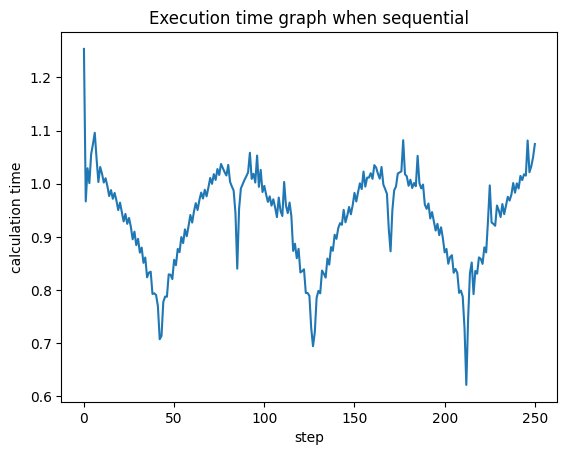

In [11]:
plt.plot(sequential_data.step, sequential_data.calc_time)
plt.xlabel('step')
plt.ylabel('calculation time')
plt.title('Execution time graph when sequential')

plt.show()

Execution time graph when parallel

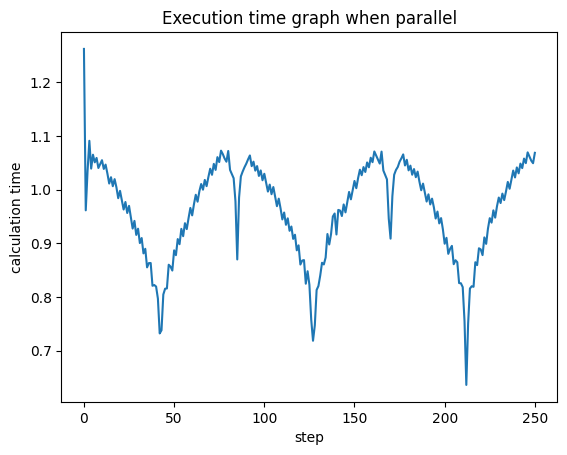

In [12]:
plt.plot(parallel_data.step, parallel_data.calc_time)
plt.xlabel('step')
plt.ylabel('calculation time')
plt.title('Execution time graph when parallel')

plt.show()

Speedup graph

0      0.993466
1      1.005523
2      0.994667
3      0.917747
4      1.016024
         ...   
246    1.011274
247    0.962258
248    0.979729
249    1.000431
250    1.005898
Name: calc_time, Length: 251, dtype: float64


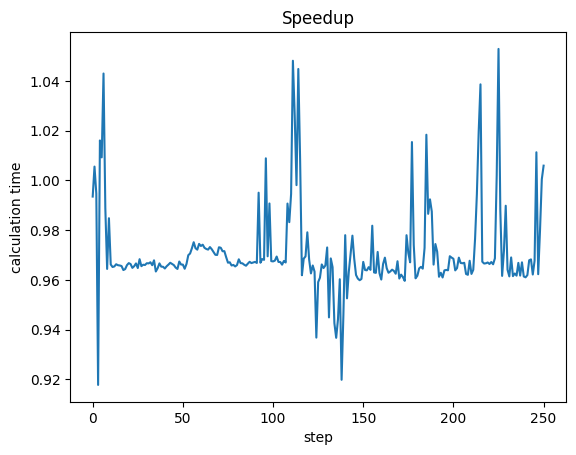

In [14]:
speedup = sequential_data.calc_time / parallel_data.calc_time

print(speedup)

plt.plot(sequential_data.step, speedup)
plt.xlabel('step')
plt.ylabel('calculation time')
plt.title('Speedup')

plt.show()

We can easily see that speedup of parallel version approximately equals to 1 in all steps. Most likely all calculations in parallel would take more time because of barriers in parallel computing case.

Efficiency equals to $E = \frac{S}{p}$ where S - time in parallel computing, p - number of threads

In [16]:
mean_time = parallel_data.calc_time.mean()
E = mean_time/5
E

0.19261909800796811

As we can see, parallel algorithm efficiency equals to 0.192.

In [9]:
def make_movie(df:pd.DataFrame, filename: str, isSequential = True):
    camera = cld.Camera(plt.figure())
    if isSequential:
        plt.title(f'Animation time from 0 to 2.5 seconds with step 0.01 sequential')
    else:
        plt.title(f'Animation time from 0 to 2.5 seconds with step 0.01 parallel')
    for step in range(250):
        ax = plt.gca().set_aspect('equal')
        plt.scatter(x=[df.x1[step], df.x2[step]], y=[df.y[step], df.y[step]], c='b', s=80)
        radius = np.sqrt((df.x1[step] - df.Ax[step])**2 + (df.y[step] - df.Ay[step])**2)
        
        arc_angles = np.linspace(-np.pi/2-df.phi1[step], -np.pi/2, 20)
        arc_xs = radius * np.cos(arc_angles) + df.x1[step]
        arc_ys = radius * np.sin(arc_angles) + df.y[step]
        plt.plot(arc_xs, arc_ys, color = 'red', lw = 3)
        
        arc_angles = np.linspace(-np.pi/2, -np.pi/2 + df.phi2[step], 20)
        arc_xs = radius * np.cos(arc_angles) + df.x2[step]
        arc_ys = radius * np.sin(arc_angles) + df.y[step]
        plt.plot(arc_xs, arc_ys, color = 'red', lw = 3)
        camera.snap()
    anim = camera.animate(blit=True)
    anim.save(filename)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


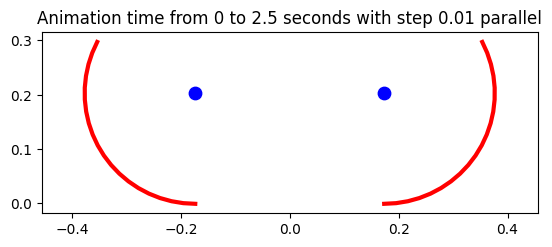

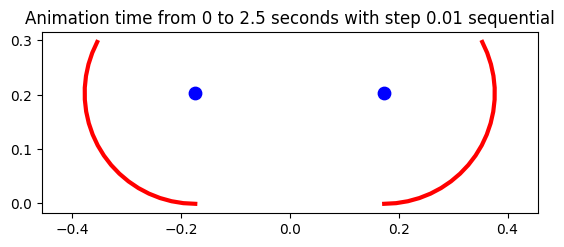

In [10]:
make_movie(parallel_data, 'animation.gif', False)
make_movie(sequential_data, 'animation2.gif', True)